In [1]:
import mysql.connector
import os
import pandas as pd
import bd as base
import copy
import matplotlib.pyplot as plt

from dotenv import load_dotenv


load_dotenv()

True

In [7]:
conexion2 = base.DB
conexion2.start()

sql = 'SELECT * FROM get_valores;'

lista = []
 
val = conexion2.query(sql,lista)
print("Informacion Obtenida")
print(len(val))

conexion2.save()
conexion2.fin()


Informacion Obtenida
3632


In [8]:
df = pd.DataFrame(val)
print(df.shape[0])


df = df.rename(columns={0 :'fecha'})
df = df.rename(columns={1 :'region'})
df = df.rename(columns={2 :'nuevos_casos'})
df = df.rename(columns={3 :'acumulado_casos'})
df = df.rename(columns={4 :'nuevas_muertes'})
df = df.rename(columns={5 :'acumulado_muertes'})
df = df.rename(columns={6 :'departamento'})
df = df.rename(columns={7 :'municipio'})
df = df.rename(columns={8 :'poblacion'})
df = df.rename(columns={9 :'valor'})


3632


In [34]:
#CANTIDAD DE NUEVAS MUERTES

dc=copy.deepcopy(df)
f1 = dc[(dc['nuevas_muertes'] != 0) ]
print(f1.shape[0])



3573


In [50]:
#CANTIDAD DE MUERTES ACUMULADAS

dc=copy.deepcopy(df)
f1 = dc[(dc['acumulado_muertes'] != 0) ]
print(f1.shape[0])

3629


In [49]:
#CANTIDAD DE POBLACION MUNICIPIOS

dc=copy.deepcopy(df)
dc = dc.drop(columns=[
    'fecha',
    'region',
    'nuevos_casos',
    'acumulado_casos',
    'nuevas_muertes',
    'acumulado_muertes',
    'valor'
    ], axis=1)

#print(dc.iloc[3631])
f1 = dc.drop_duplicates(subset=['departamento', 'municipio', 'poblacion'])

f2 = f1[(f1['poblacion'] > 0) ]
print(f2.shape[0])



299


In [75]:
#PROMEDIO ESTANDAR DE NUEVAS MUERTES

dc=copy.deepcopy(df)
f1 = dc[(dc['nuevas_muertes'] != 0) ]
f2 = f1[['nuevas_muertes']]
f3 = f2['nuevas_muertes'].mean() 

print(f3)

23.830954380072768


In [77]:
#PROMEDIO DE MUERTES ACUMULADAS

dc=copy.deepcopy(df)
f1 = dc[(dc['acumulado_muertes'] != 0) ]
f2 = f1[['acumulado_muertes']]
f3 = f2['acumulado_muertes'].mean() 

print(f3)

2284.0093689721684


In [4]:
#PROMEDIO DE POBLACION MUNICIPIOS

dc=copy.deepcopy(df)
dc = dc.drop(columns=[
    'fecha',
    'region',
    'nuevos_casos',
    'acumulado_casos',
    'nuevas_muertes',
    'acumulado_muertes',
    'valor'
    ], axis=1)

#print(dc.iloc[3631])
f1 = dc.drop_duplicates(subset=['departamento', 'municipio', 'poblacion'])
f2 = f1[(f1['poblacion'] > 0) ]
f3 = f2[['poblacion']]
f4 = f3['poblacion'].mean() 

print(f4)


53972.79933110368


In [55]:
#DESVIACION ESTANDAR DE NUEVAS MUERTES

dc=copy.deepcopy(df)
f1 = dc[(dc['nuevas_muertes'] != 0) ]
f2 = f1[['nuevas_muertes']]
f3 = f2['nuevas_muertes'].std() 

print(f3)



14.492322333556437


In [57]:
#DESVIACION DE MUERTES ACUMULADAS

dc=copy.deepcopy(df)
f1 = dc[(dc['acumulado_muertes'] != 0) ]
f2 = f1[['acumulado_muertes']]
f3 = f2['acumulado_muertes'].std() 

print(f3)


1324.4691953027082


In [71]:
#DESVIACION DE POBLACION MUNICIPIOS

dc=copy.deepcopy(df)
dc = dc.drop(columns=[
    'fecha',
    'region',
    'nuevos_casos',
    'acumulado_casos',
    'nuevas_muertes',
    'acumulado_muertes',
    'valor'
    ], axis=1)

#print(dc.iloc[3631])
f1 = dc.drop_duplicates(subset=['departamento', 'municipio', 'poblacion'])
f2 = f1[(f1['poblacion'] > 0) ]
f3 = f2[['poblacion']]
f4 = f3['poblacion'].std() 

print(f4)


85674.20576832576


In [72]:
#MINIMO DE NUEVAS MUERTES

dc=copy.deepcopy(df)
f1 = dc[(dc['nuevas_muertes'] != 0) ]
f2 = f1[['nuevas_muertes']]
f3 = f2['nuevas_muertes'].min() 

print(f3)



1


In [73]:
#MINIMO DE MUERTES ACUMULADAS

dc=copy.deepcopy(df)
f1 = dc[(dc['acumulado_muertes'] != 0) ]
f2 = f1[['acumulado_muertes']]
f3 = f2['acumulado_muertes'].min() 

print(f3)


1


In [74]:
#MINIMO DE POBLACION MUNICIPIOS

dc=copy.deepcopy(df)
dc = dc.drop(columns=[
    'fecha',
    'region',
    'nuevos_casos',
    'acumulado_casos',
    'nuevas_muertes',
    'acumulado_muertes',
    'valor'
    ], axis=1)

#print(dc.iloc[3631])
f1 = dc.drop_duplicates(subset=['departamento', 'municipio', 'poblacion'])
f2 = f1[(f1['poblacion'] > 0) ]
f3 = f2[['poblacion']]
f4 = f3['poblacion'].min() 

print(f4)

2563


In [78]:
#MAXIMO DE NUEVAS MUERTES

dc=copy.deepcopy(df)
f1 = dc[(dc['nuevas_muertes'] != 0) ]
f2 = f1[['nuevas_muertes']]
f3 = f2['nuevas_muertes'].max() 

print(f3)


61


In [79]:
#MAXIMO DE MUERTES ACUMULADAS

dc=copy.deepcopy(df)
f1 = dc[(dc['acumulado_muertes'] != 0) ]
f2 = f1[['acumulado_muertes']]
f3 = f2['acumulado_muertes'].max() 

print(f3)

4803


In [80]:
#MAXIMO DE POBLACION MUNICIPIOS

dc=copy.deepcopy(df)
dc = dc.drop(columns=[
    'fecha',
    'region',
    'nuevos_casos',
    'acumulado_casos',
    'nuevas_muertes',
    'acumulado_muertes',
    'valor'
    ], axis=1)

#print(dc.iloc[3631])
f1 = dc.drop_duplicates(subset=['departamento', 'municipio', 'poblacion'])
f2 = f1[(f1['poblacion'] > 0) ]
f3 = f2[['poblacion']]
f4 = f3['poblacion'].max() 

print(f4)

1205668


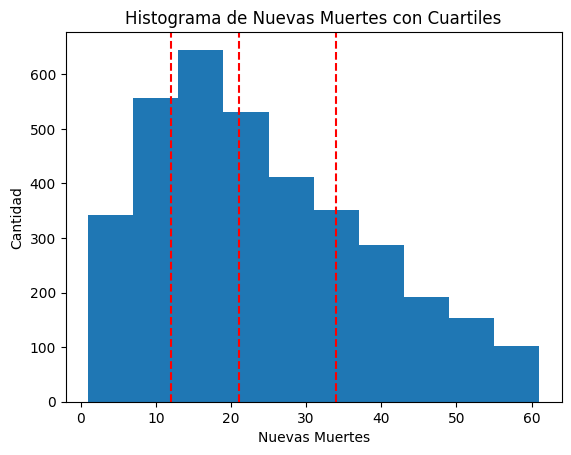

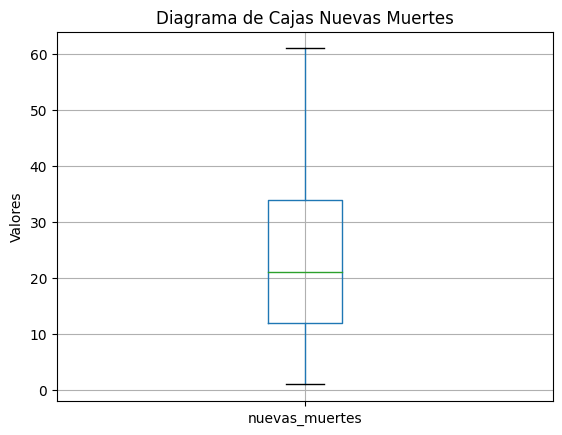

0.25    12.0
0.50    21.0
0.75    34.0
Name: nuevas_muertes, dtype: float64


In [10]:
#CUARTILES DE NUEVAS MUERTES

dc=copy.deepcopy(df)
f1 = dc[(dc['nuevas_muertes'] != 0) ]
f2 = f1[['nuevas_muertes']]
f3 = f2['nuevas_muertes'].quantile([0.25, 0.5, 0.75])

plt.hist(f2['nuevas_muertes'])

# Agregar líneas de cuartiles
for quartile in f3:
    plt.axvline(quartile, color='red', linestyle='--')

plt.title('Histograma de Nuevas Muertes con Cuartiles')
plt.xlabel('Nuevas Muertes')
plt.ylabel('Cantidad')
plt.show()


f2.boxplot()
plt.title('Diagrama de cajas Nuevas Muertes')
plt.ylabel('Valores')

# Mostrar el gráfico
plt.show()


print(f3)


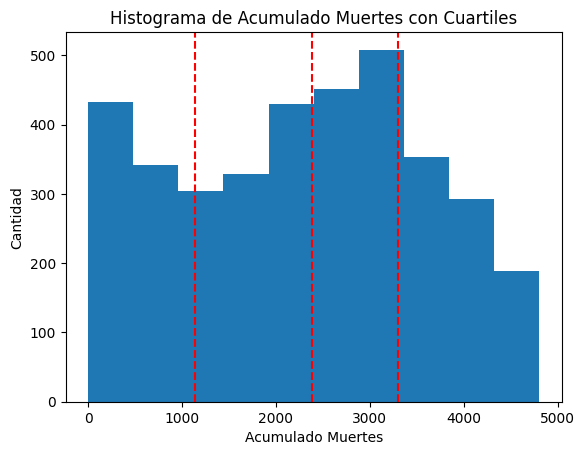

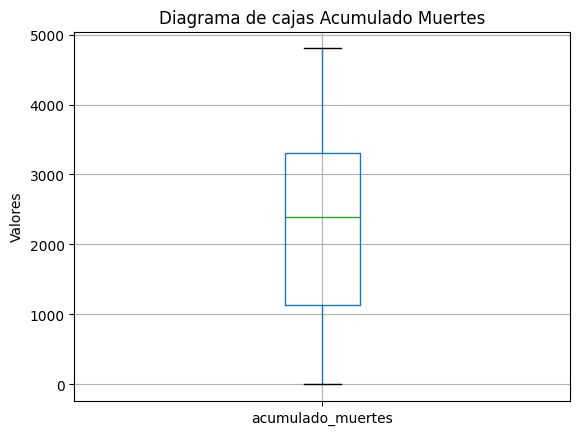

0.25    1139.0
0.50    2389.0
0.75    3302.0
Name: acumulado_muertes, dtype: float64


In [13]:
#CUARTILES DE MUERTES ACUMULADAS

dc=copy.deepcopy(df)
f1 = dc[(dc['acumulado_muertes'] != 0) ]
f2 = f1[['acumulado_muertes']]
f3 = f2['acumulado_muertes'].quantile([0.25, 0.5, 0.75])

plt.hist(f2['acumulado_muertes'])

# Agregar líneas de cuartiles
for quartile in f3:
    plt.axvline(quartile, color='red', linestyle='--')

plt.title('Histograma de Acumulado Muertes con Cuartiles')
plt.xlabel('Acumulado Muertes')
plt.ylabel('Cantidad')
plt.show()

f2.boxplot()
plt.title('Diagrama de cajas Acumulado Muertes')
plt.ylabel('Valores')

# Mostrar el gráfico
plt.show()


print(f3)

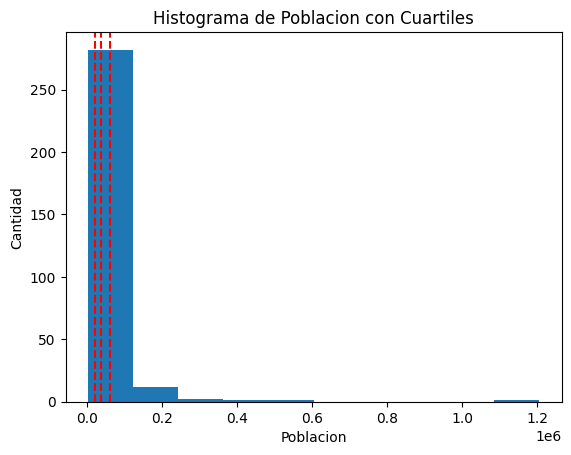

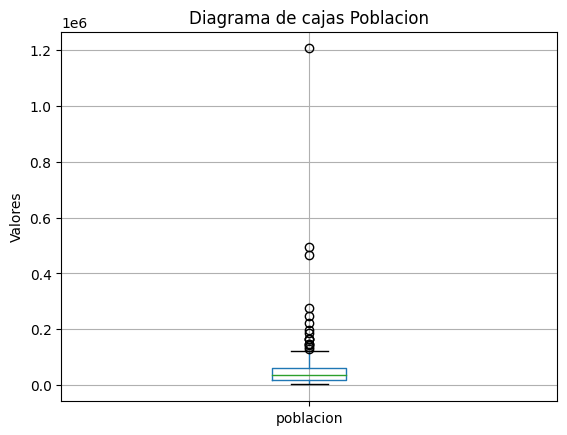

      poblacion
0         54623
6         28445
20      1205668
26        70118
31        54588
...         ...
3162      23166
3163     104861
3184      10646
3474       2563
3589      25332

[299 rows x 1 columns]


In [14]:
#CUARTILES DE POBLACION MUNICIPIOS

dc=copy.deepcopy(df)
dc = dc.drop(columns=[
    'fecha',
    'region',
    'nuevos_casos',
    'acumulado_casos',
    'nuevas_muertes',
    'acumulado_muertes',
    'valor'
    ], axis=1)

#print(dc.iloc[3631])
f1 = dc.drop_duplicates(subset=['departamento', 'municipio', 'poblacion'])
f2 = f1[(f1['poblacion'] > 0) ]
f3 = f2[['poblacion']]
f4 = f3['poblacion'].quantile([0.25, 0.5, 0.75])

plt.hist(f3['poblacion'])

# Agregar líneas de cuartiles
for quartile in f4:
    plt.axvline(quartile, color='red', linestyle='--')

plt.title('Histograma de Poblacion con Cuartiles')
plt.xlabel('Poblacion')
plt.ylabel('Cantidad')
plt.show()

f3.boxplot()
plt.title('Diagrama de cajas Poblacion')
plt.ylabel('Valores')

# Mostrar el gráfico
plt.show()


print(f3)

In [88]:
import pandas as pd

# Crear un DataFrame de ejemplo
data = {'columna1': [1, 2, 3, 4, 5],
        'columna2': [10, 20, 30, 40, 50]}
df = pd.DataFrame(data)

# Calcular la desviación estándar por columna
desviacion_estandar = df.std()
print(desviacion_estandar)

columna1     1.581139
columna2    15.811388
dtype: float64


[[0.17013139 0.61854727 0.64800316]
 [0.43233072 0.64949453 0.42971764]
 [0.74279989 0.34735568 0.63222505]]


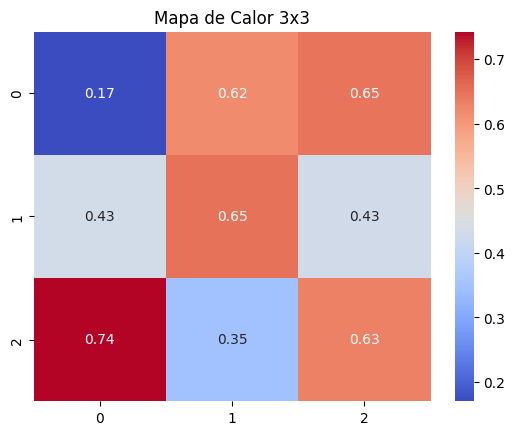

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Crear una matriz de 3x3 con valores aleatorios
data = np.random.rand(3, 3)
print(data)
# Crear el mapa de calor
sns.heatmap(data, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa de Calor 3x3")
plt.show()

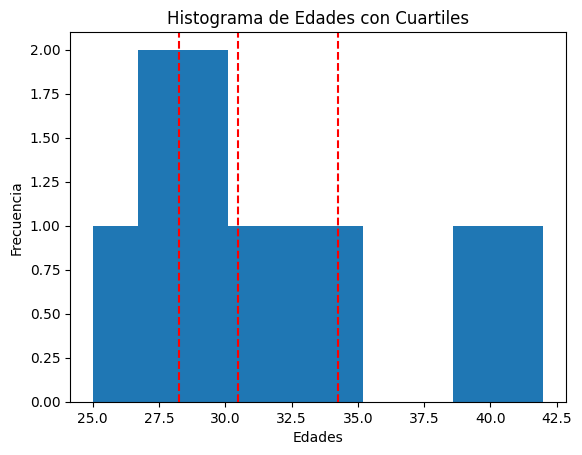

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear DataFrame
data = {'edades': [25, 30, 28, 35, 40, 42, 32, 29, 31, 27]}
df = pd.DataFrame(data)

# Calcular cuartiles
cuartiles = df['edades'].quantile([0.25, 0.5, 0.75])

# Crear histograma
plt.hist(df['edades'])

# Agregar líneas de cuartiles
for quartile in cuartiles:
    plt.axvline(quartile, color='red', linestyle='--')

plt.title('Histograma de Edades con Cuartiles')
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.show()

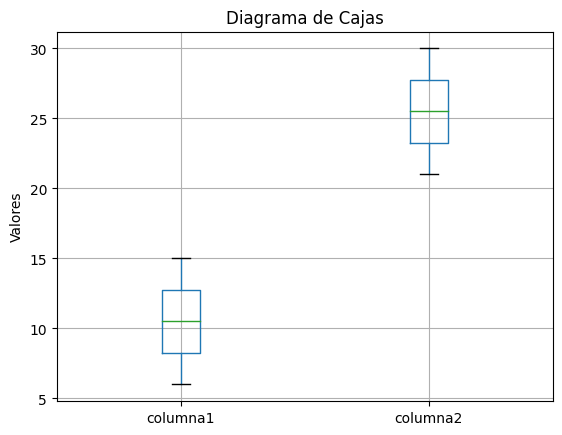

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame de ejemplo
data = {'columna1': [10, 7, 13, 9, 11, 15, 6, 12, 8, 14],
        'columna2': [25, 22, 28, 24, 26, 30, 21, 27, 23, 29]}
df = pd.DataFrame(data)

# Crear el diagrama de cajas
df.boxplot()

# Personalizar el gráfico (opcional)
plt.title('Diagrama de Cajas')
plt.ylabel('Valores')

# Mostrar el gráfico
plt.show()



